In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
%matplotlib inline

Over-fitting turns out to be a property of decision trees. It is very easy to go too deep in the tree, and thus to fit details of the particular data sample, rather than the overall properties of the distributions they are drawn from. 
![alt text](Errata/Fig7.pdf "I Spy With My Little Eye")


# Section 2. Random Forests
In this scenario, we use Ensemble Methods and use a randomized set of such "trees" to create a "forest". The basis of ensemble methods lies in the famous Condorcet’s Jury Theorem: A group wants to arrive at the “correct” decision via majority vote, wherein each individual has a probability p of voting for the correct decision. What should the size of the group be for optimal performance?
It has been shown that if the individual is doing better than random guessing, then the more independent adjudicators in the group, the better the chances of getting the "right" answer.

Intuitive example: The performance of the “Ask The Audience” lifeline in Who Wants To Be A Millionaire? 

(92% accuracy for “Ask The Audience” vs only 65% for “Phone A Friend”)

In this manner, Aggregating randomized models decreases the variance of the ensemble, while still retaining the low bias.

## Section 2.1 Random Forests: Toy Classification Example

Text(0, 0.5, '$X_2$')

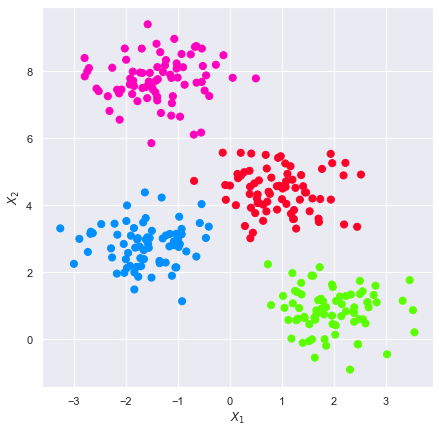

In [41]:
X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=0.65)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

In [42]:
model = RandomForestClassifier(n_estimators=50, random_state=0)

In [43]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

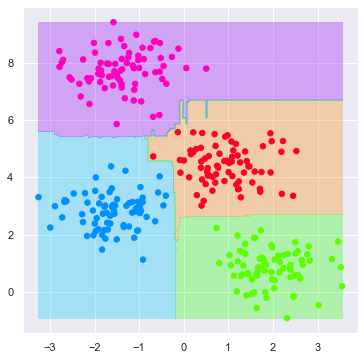

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='gist_rainbow',clim=(y.min(), y.max()), zorder=3)
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]), num=200),np.linspace(np.min(X[:,1]),np.max(X[:,1]), num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = plt.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='gist_rainbow', zorder=1)

### Exercise 1:
In this exercise, we will be applying random forest classifier model on a cancer dataset. The set consists of measurements of 569 patients, with features describing the tumors, and the target classifying the tumors as malignant or benign, thus it is a classification problem.

We import this dataset, split it into training and testing sets, and train a random forest classifier on this set.

In [48]:
data = load_breast_cancer()
X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

In [49]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [50]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [55]:
#Step 1: Split the data into train and test sets (80%-20%)


In [ ]:
# Step 2: Instantiate a random forest classifier model with 100 estimators and a random state of 42. 
# If you complete this exercise early, Feel free to test the max_depth=4/5/6... hyperparameter too.


In [54]:
# Step 3: Fit the model on the training data, 
#and evaluate its score on the training and the test data (model.score(X_test, y_test))


#### Deriving Insight from the Random Forest Model

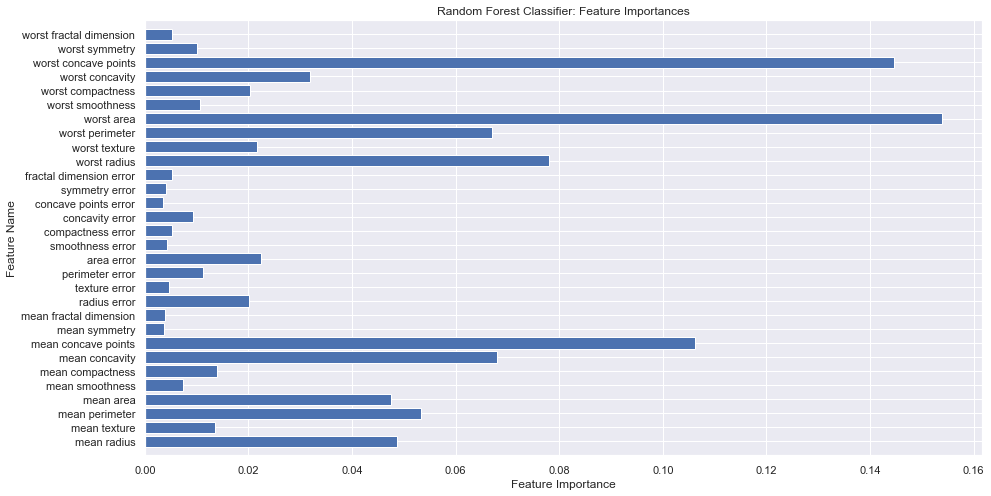

In [53]:
breast_cancer_features = [x for i,x in enumerate(data.feature_names)]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(15,8))
    n_features = 30
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Random Forest Classifier: Feature Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.ylim(-1, n_features)
 
breast_cancer_feature_importances_plot(clf)
plt.show()

#### Hyperparameter selection for the Random Forest, on the Iris Dataset

A dataset with 150 samples from 3 different types of Iris flowers. The features are the length and width of the petals and sepals of each flower. The target is the type of Iris flower (setosa, virginica, versicolor)

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

X.shape,y.shape

((150, 4), (150,))

In [60]:
params={'n_estimators':[10,20], 'max_features':['sqrt',0.25]}

In [62]:
model=RandomForestClassifier()
clf=GridSearchCV(model,params,cv=5)

In [63]:
model_fin=clf.fit(X,y)

In [ ]:
print(model_fin.best_estimator_.get_params())

### Exercise 2

Let's do this Iris classification problem, **properly**.
First, divide the dataset into train and test samples (80%-20%).
Now, use your training data to select the "best" hyperparameters for 

a. the number of estimators (from 10-500) 

b. the maximum features to be between 'sqrt' and different ratios of the toal number of features, from 0.1 to 1.0.

c. the maximum depth of the trees in the ensemble, from 2 to 10.

Train this selected model on the training data, and evaluate its performance on the test dataset.
Report the accuracy of the final model on the training dataset and the test dataset.

## Section 2.2 Random Forests: Time series Regression Example
In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

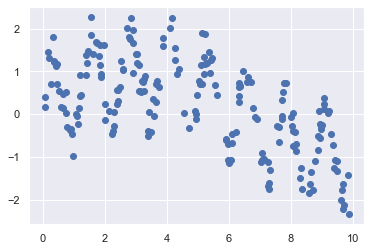

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def modelts(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = modelts(x)
plt.scatter(x, y)

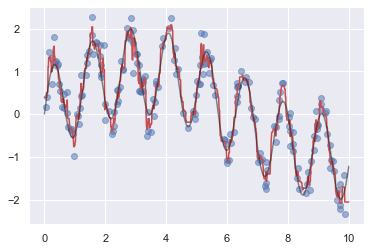

In [9]:
forest = RandomForestRegressor(n_estimators=200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = modelts(xfit, sigma=0)

plt.scatter(x, y,alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

The true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model.

### Exercise 3

The Diabetes Dataset: 442 measurements from diabetes patients on features like age, sex, BMI, Blood Pressure, Serum measurements. The target is quantitative measurement of the progress of diabetes one year after these measurements were taken. 

A good ML model would be useful not just to predict the future incidence for new patients, but also evaluate the importance of different features on the progress of the disease.

We'll fit a Random Forest Regressor to this dataset and evaluate it's performance.

a) Split the data into a train-test set (80%-20%)

b) Use cross validation to select good hyperparameters for your Random Forest Regressor

c) Train this selected Random forest model on your training data.

d) evaluate it's performance on the test data.

e) Report the relative importance of different features affecting the progress of diabetes.

In [13]:
dataset=load_diabetes()
X=dataset.data
y=dataset.target

X.shape, y.shape

((442, 10), (442,))

In [14]:
print(dataset.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Section 2.3 Random Forests: MNIST Dataset Classification
As a final example, we apply the Random Forest Algorithm to the (too) well known MNIST dataset, for classifying images

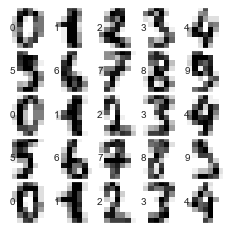

In [28]:
digits = load_digits()
fig = plt.figure(figsize=(3, 3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 4, str(digits.target[i]))

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [30]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



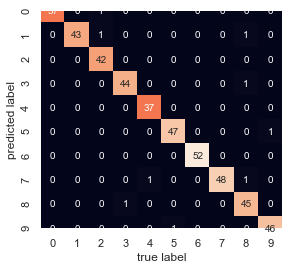

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Exercise solutions

#### Exercise 1 Solution

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8 ,random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

#### Exercise 2 Solutions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8 ,random_state=42)

In [ ]:
params={'n_estimators':[50,100,200,500], 'max_features':['sqrt',0.1,0.3,0.5,0.7,1.0], 'max_depth':[2,5,7,10]}

In [ ]:
model=RandomForestClassifier()
clf=GridSearchCV(model,params,cv=5)

In [ ]:
model_fin=clf.fit(X,y)

In [ ]:
print(model_fin.best_estimator_.get_params())

#### Exercise 3 Solutions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8 ,random_state=42)

In [ ]:
params={'n_estimators':[50,100,200], 'max_features':['sqrt',0.1,0.3,0.5], 'max_depth':[5,7,10]}

In [ ]:
model=RandomForestRegressor()
reg=GridSearchCV(model,params,cv=4)

In [ ]:
model_fin=reg.fit(X_train,y_train)

In [ ]:
print(model_fin.best_estimator_.get_params())

In [ ]:
model=RandomForestRegressor(n_estimators=50, max_features='sqrt',max_depth=10)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test), model.score(X_train,y_train)

In [ ]:
for i in range(10):
    print(dataset.feature_names[i],model.feature_importances_[i])